# Big Ideas Final Project

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

## Criteria for finding best neighborhood

5 main categories:
- Fire
- Crime
- Affordablity
- Mobility

In [4]:
# Weights for each category (custom per user)
weights = {
    "fire": 0.10,
    "air_quality": 0.10,
    "affordability": 0.30,
    "crime": 0.30,
    "mobility": 0.20
}


# Purple Air Data Tool
https://community.purpleair.com/t/download-sensor-data/100

In [25]:
# Neighborhoods
nb_data = pd.read_csv("../input/neighborhoods/668d7238-cfd2-492e-b397-51a6e74182ff.csv", low_memory=False)

nb_data.columns



Index(['_id', 'objectid', 'fid_blockg', 'statefp10', 'countyfp10', 'tractce10',
       'blkgrpce10', 'geoid10', 'namelsad10', 'mtfcc10', 'funcstat10',
       'aland10', 'awater10', 'intptlat10', 'intptlon10', 'shape_leng',
       'fid_neighb', 'pghdb_sde_neighborhood_2010_area', 'perimeter',
       'neighbor', 'neighbor_i', 'hood', 'hood_no', 'acres', 'sqmiles',
       'dpwdiv', 'unique_id', 'sectors', 'shape_le_1', 'shape_ar_1',
       'page_number', 'plannerassign', 'globalid', 'created_user',
       'created_date', 'last_edited_user', 'last_edited_date', 'temp',
       'shape_area', 'shape_length'],
      dtype='object')

In [26]:
neighborhoods = nb_data["hood"].unique()
print(neighborhoods)

['Point Breeze North' 'Squirrel Hill North' 'Garfield' 'Bedford Dwellings'
 'Knoxville' 'Homewood South' 'Middle Hill' 'Oakwood' 'North Oakland'
 'Duquesne Heights' 'Glen Hazel' 'East Liberty' 'Westwood' 'Morningside'
 'Lincoln Place' 'Perry North' 'Northview Heights' 'Homewood North'
 'Arlington Heights' 'Lower Lawrenceville' 'Larimer'
 'Lincoln-Lemington-Belmar' 'Bluff' 'Fairywood' 'Brookline' 'Hays'
 'Beltzhoover' 'Greenfield' 'East Carnegie' 'North Shore' 'Allentown'
 'Bon Air' 'Allegheny West' 'Crafton Heights' 'Manchester'
 'Marshall-Shadeland' 'Highland Park' 'New Homestead' 'Central Northside'
 'Polish Hill' 'Overbrook' 'Friendship' 'Homewood West'
 'Central Business District' 'East Allegheny' 'Allegheny Center'
 'Central Oakland' 'Brighton Heights' 'South Side Slopes' 'Arlington'
 'Chartiers City' 'Carrick' 'Bloomfield' 'Banksville' 'Mount Washington'
 'East Hills' 'Central Lawrenceville' 'West End' 'Esplen' 'Point Breeze'
 'Hazelwood' 'Crawford-Roberts' 'South Oakland' 'Upper

In [27]:
len(neighborhoods)

90

In [29]:
# Perimeters


In [30]:
aq_data = pd.read_csv("../input/air-quality/4ab1e23f-3262-4bd3-adbf-f72f0119108b.csv", low_memory=False)

In [31]:
aq_data = aq_data[(aq_data['date'] > '2020-01-01') & (aq_data['date'] < '2024-11-13')]
sites = aq_data["site"].unique()
sites

array(['South Fayette', 'Liberty', 'Lawrenceville 2', 'North Braddock',
       'Avalon', 'Liberty 2', 'Parkway East', 'Lawrenceville',
       'Pittsburgh', 'Clairton', 'Lincoln', 'Flag Plaza',
       'Glassport High Street', 'Harrison Township'], dtype=object)

This data set is flawed because of how little sensors it employs. We could do some fancy geographical analysis and average air quality in each neighborhood based on their proximity to our sensors but this would be a moot effort due to the availiability of other datasets, primarily from private providers like PurpleAir which have a much more extensive network

Here's the public air quality data visualized:


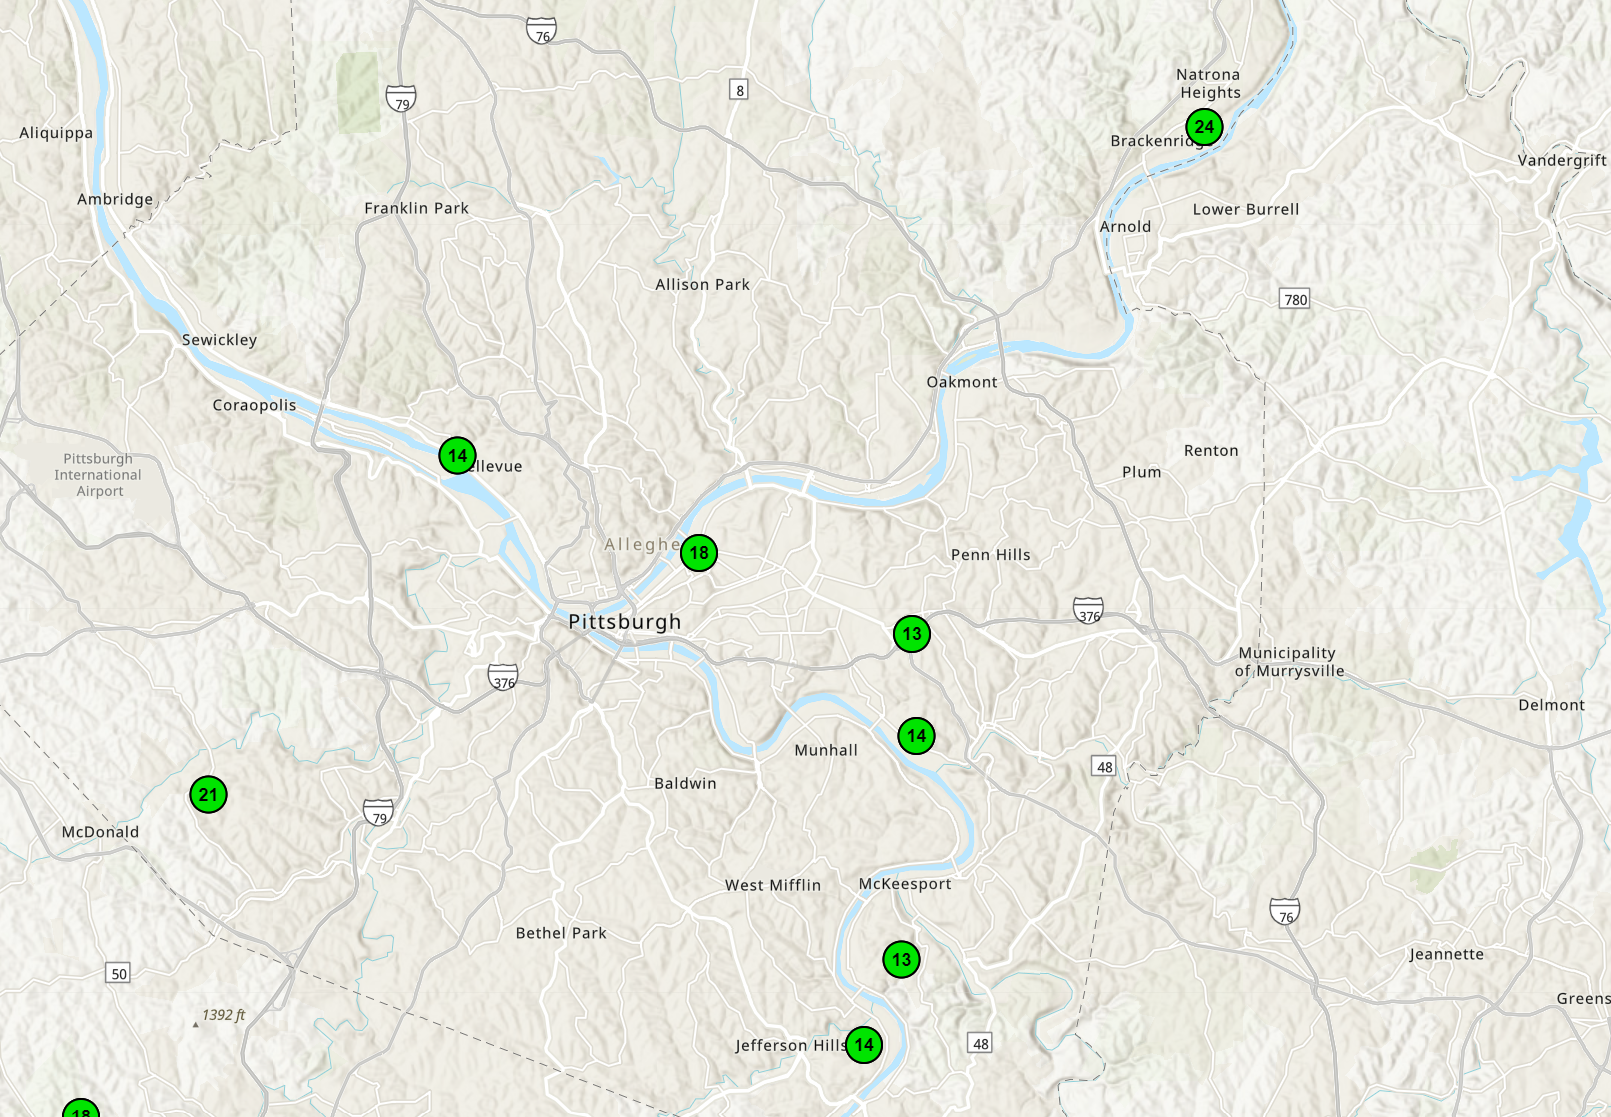

And here is a similar map with Purple Air data:
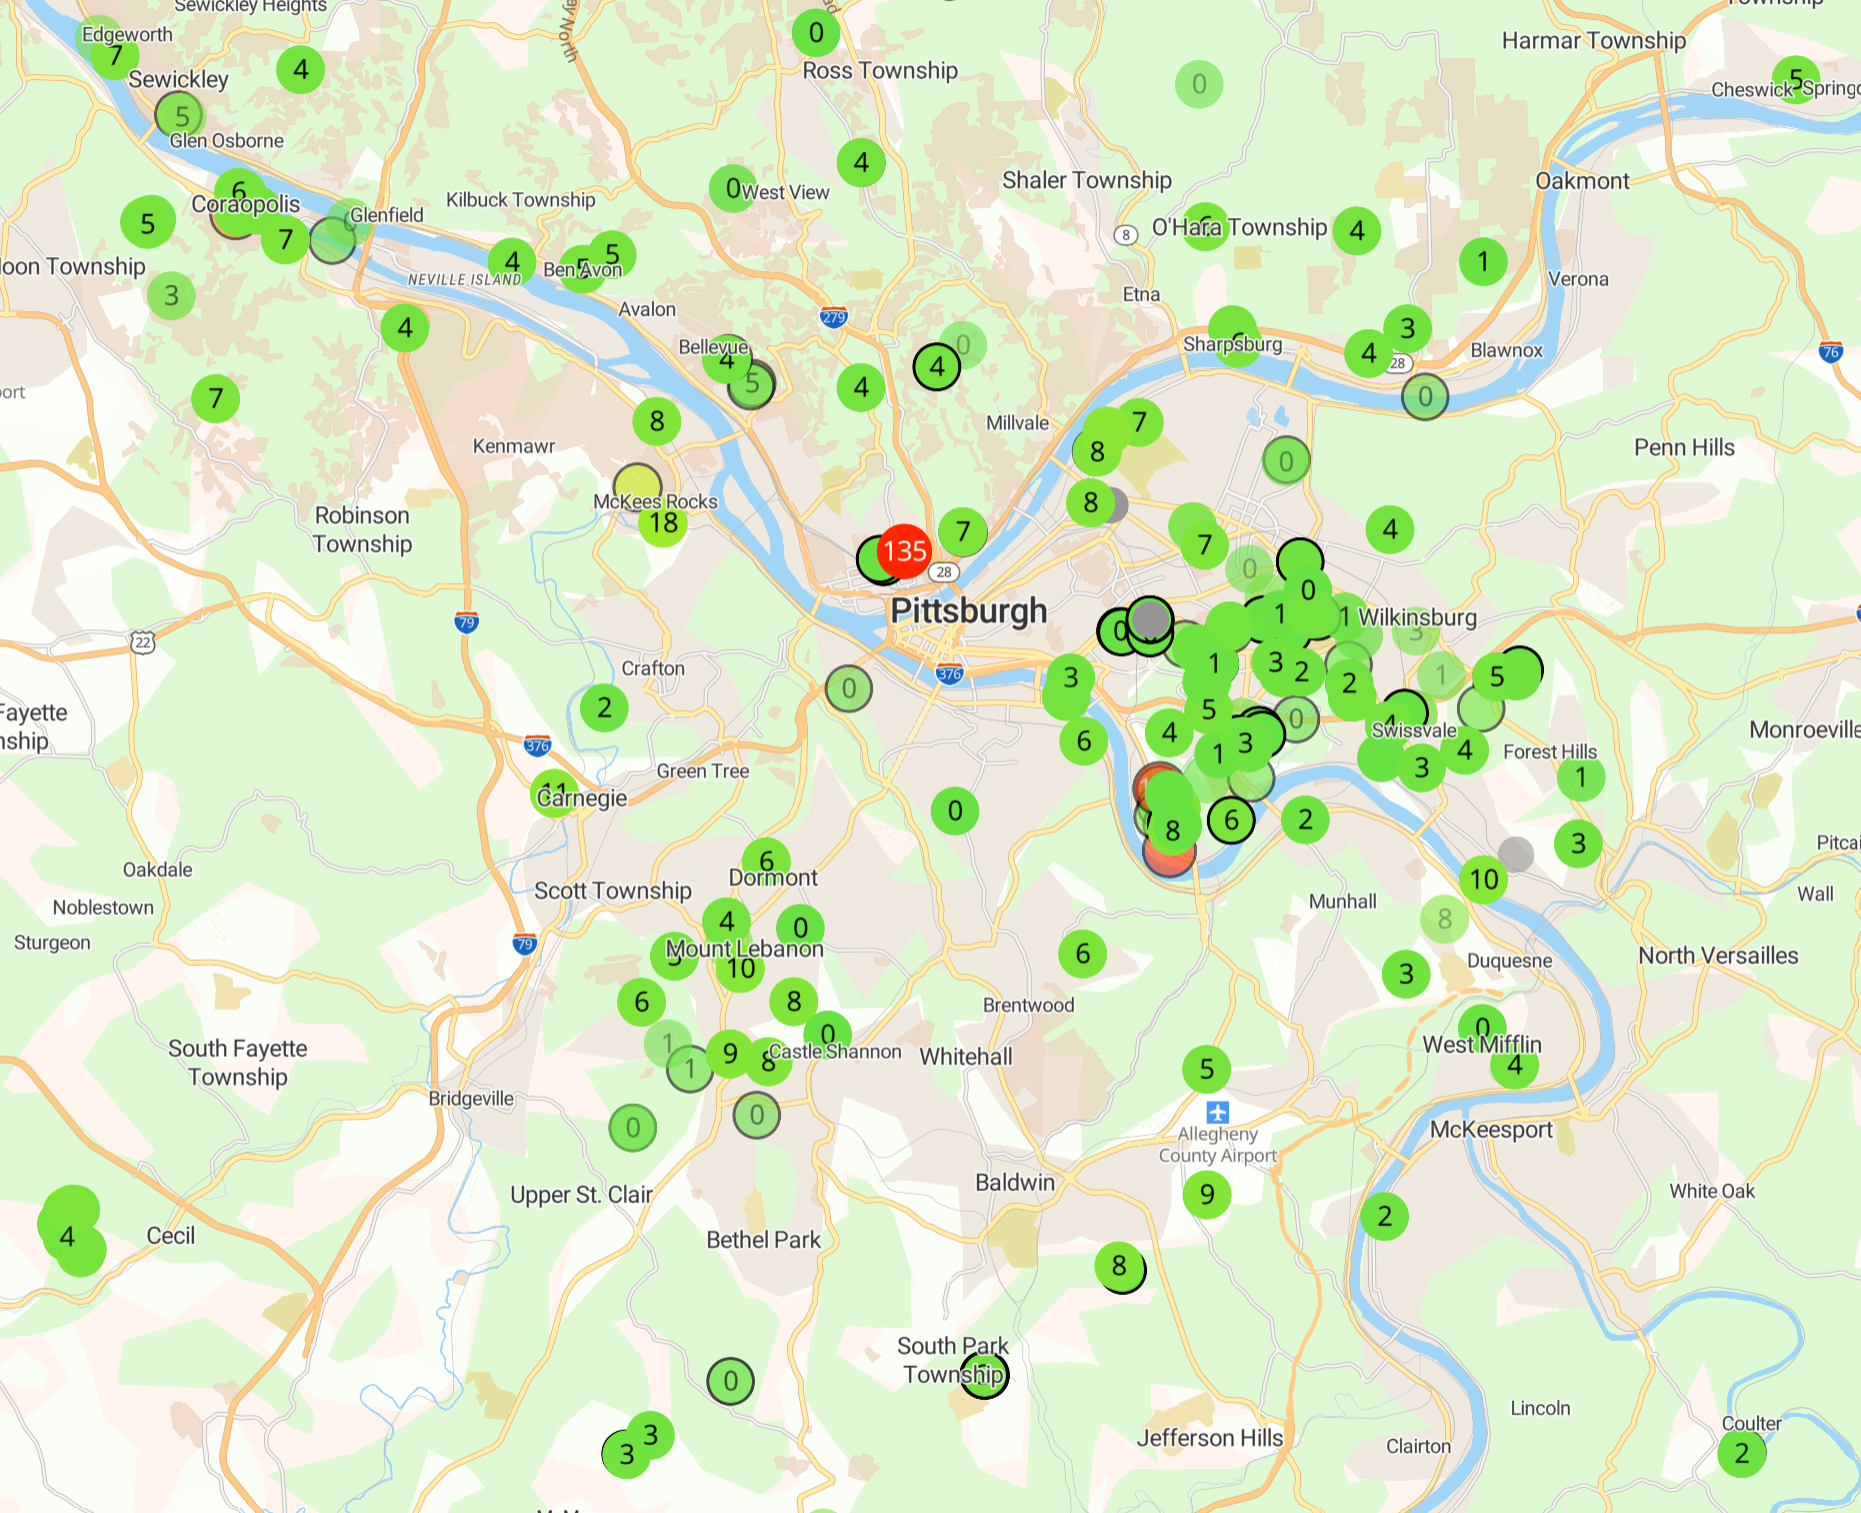

To calculate air quality, we are going to get the closest sensor

# Fire Data

In [15]:
fire_data = pd.read_csv("../input/fire-data/8d76ac6b-5ae8-4428-82a4-043130d17b02.csv")


In [ ]:
# Columns
fire_data.columns

Lets see 

In [24]:
fire_nbs = fire_data["neighborhood"].unique()[1:]
fire_nbs

array(['Fineview', 'Fairywood', 'South Side Flats',
       'Lincoln-Lemington-Belmar', 'Carrick', 'Beechview', 'Allentown',
       'Beltzhoover', 'Crafton Heights', 'Homewood North',
       'Squirrel Hill South', 'Perry North', 'Bedford Dwellings',
       'Homewood South', 'East Allegheny', 'Crawford-Roberts', 'Sheraden',
       'Middle Hill', 'Greenfield', 'North Shore', 'Upper Hill',
       'Manchester', 'Overbrook', 'Polish Hill', 'Central Lawrenceville',
       'South Oakland', 'Central Business District', 'Homewood West',
       'East Liberty', 'Hazelwood', 'Brookline', 'Squirrel Hill North',
       'Friendship', 'East Hills', 'Windgap', 'Knoxville',
       'Upper Lawrenceville', 'Arlington', 'Elliott', 'South Side Slopes',
       'Bloomfield', 'Central Northside', 'Bluff', 'Garfield',
       'Marshall-Shadeland', 'North Oakland', 'Point Breeze North',
       'Swisshelm Park', 'Banksville', 'Shadyside', 'Spring Garden',
       'Troy Hill', 'Regent Square', 'Brighton Heights',
    

In [23]:
# Filter out confined fires (smaller fires)
fire_data = fire_data[fire_data["type_description"].str.contains("confined")==False]

In [33]:
# Load population data

pop_data = pd.read_csv("../input/population/a8414ed5-c50f-417e-bb67-82b734660da6.csv")
pop_data.columns

Index(['_id', 'Neighborhood', '2010_Total_Population',
       '2010_OneRace_Population', '2010_White_Alone_Population',
       '2010_Black_Alone_Population',
       '2010_American_Indian_and_Alaska_Native_alone_population',
       '2010_Asian_Alone_Population',
       '2010_Native_Hawaiian_and_Other_Pacific_Islander_alone_Populatio',
       '2010_Any_other_single_race_alone_Popualtion',
       '2010_Population_two_or_more_races',
       '2010_Hispanic_or_Latino_Population', '2020_Total_Population',
       '2020_OneRace_Population', '2020_White_Alone_Population',
       '2020_Black_Alone_Population',
       '2020_American_Indian_and_Alaska_Native_alone_population',
       '2020_Asian_Alone_Population',
       '2020_Native_Hawaiian_and_Other_Pacific_Islander_alone_Populatio',
       '2020_Any_other_single_race_alone_Popualtion',
       '2020_Population_two_or_more_races',
       '2020_Hispanic_or_Latino_Population',
       'Change_2010_to_2020_Total_Population',
       'Change_2010_to_20

In [110]:
# Getting number of fire incidents per neighborhood
from collections import OrderedDict
data = {}
data_per_capita = {}

normalized_neighborhoods = list(set(neighborhoods).intersection(set(pop_data["Neighborhood"])))
for n in normalized_neighborhoods:
    population = pop_data.loc[pop_data["Neighborhood"] == n]["2020_Total_Population"].values[0]
    data[n] = fire_data.loc[fire_data["neighborhood"] == n].shape[0]
    data_per_capita[n] = data[n] / population

data = OrderedDict(sorted(data.items(), key=lambda item: item[1]))
data_per_capita = OrderedDict(sorted(data_per_capita.items(), key=lambda item: item[1]))
data_per_capita

OrderedDict([('Squirrel Hill North', 0.006061116255577069),
             ('North Oakland', 0.006641099990646338),
             ('Westwood', 0.006902761104441777),
             ('Regent Square', 0.007209062821833162),
             ('Shadyside', 0.007442710713586212),
             ('Glen Hazel', 0.007587253414264037),
             ('Oakwood', 0.00878048780487805),
             ('Swisshelm Park', 0.008961911874533234),
             ('Morningside', 0.00922509225092251),
             ('Highland Park', 0.009302325581395349),
             ('Point Breeze', 0.009536275243081526),
             ('Stanton Heights', 0.009939010616670432),
             ('Banksville', 0.01090380421613763),
             ('Friendship', 0.011716760061130923),
             ('Central Oakland', 0.011825192802056555),
             ('Squirrel Hill South', 0.012078083175556571),
             ('Greenfield', 0.012394986916402699),
             ('Brookline', 0.012631095460460843),
             ('Duquesne Heights', 0.013350020859

In [117]:
# Grading

fire_ranks = dictzip(data_per_capita.keys(), pd.Series(data_per_capita.values()).rank().tolist()))
fire_ranks

{'Squirrel Hill North': 1.0,
 'North Oakland': 2.0,
 'Westwood': 3.0,
 'Regent Square': 4.0,
 'Shadyside': 5.0,
 'Glen Hazel': 6.0,
 'Oakwood': 7.0,
 'Swisshelm Park': 8.0,
 'Morningside': 9.0,
 'Highland Park': 10.0,
 'Point Breeze': 11.0,
 'Stanton Heights': 12.0,
 'Banksville': 13.0,
 'Friendship': 14.0,
 'Central Oakland': 15.0,
 'Squirrel Hill South': 16.0,
 'Greenfield': 17.0,
 'Brookline': 18.0,
 'Duquesne Heights': 19.0,
 'Crafton Heights': 20.0,
 'Central Lawrenceville': 21.0,
 'East Carnegie': 22.0,
 'Point Breeze North': 23.0,
 'Overbrook': 24.0,
 'Windgap': 25.0,
 'Bloomfield': 26.0,
 'Brighton Heights': 27.0,
 'Beechview': 28.0,
 'West Oakland': 29.0,
 'Fairywood': 30.0,
 'Summer Hill': 31.0,
 'Lincoln Place': 32.0,
 'Upper Lawrenceville': 33.0,
 'Bluff': 34.0,
 'Lower Lawrenceville': 35.0,
 'South Side Slopes': 36.0,
 'Mount Washington': 37.0,
 'New Homestead': 38.0,
 'Terrace Village': 39.0,
 'Garfield': 40.0,
 'Perry North': 41.0,
 'Upper Hill': 42.0,
 'South Oakland': 

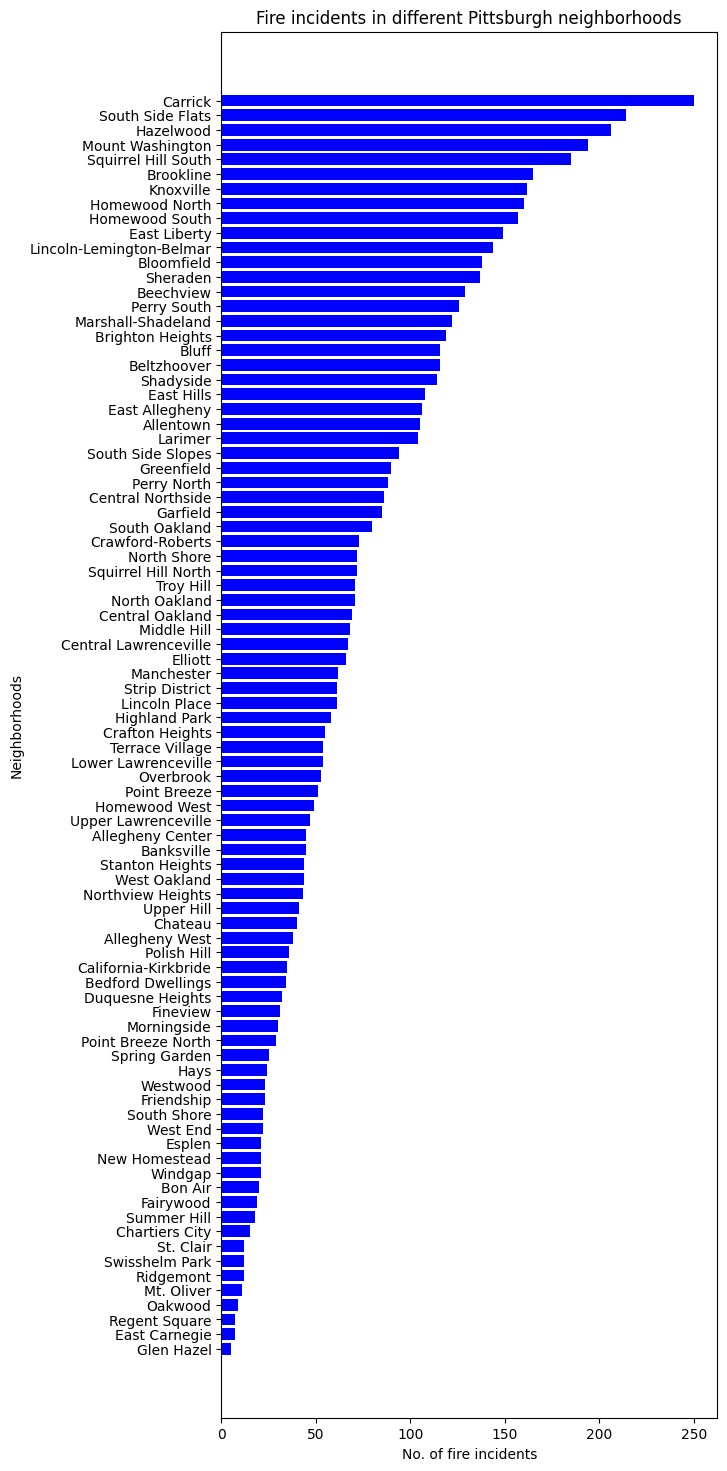

In [111]:
plt.figure().set_figheight(18)

neighborhoods = list(data.keys())
numOfIncidents = list(data.values())

plt.barh(neighborhoods, numOfIncidents, color = "blue" )

plt.ylabel("Neighborhoods")
plt.xlabel("No. of fire incidents")
plt.title("Fire incidents in different Pittsburgh neighborhoods")
plt.show()

Now it would be easy to just take this data and make conclusions but it is important to consider context. Here's a recalculated bar chart with 

<Figure size 500x480 with 0 Axes>

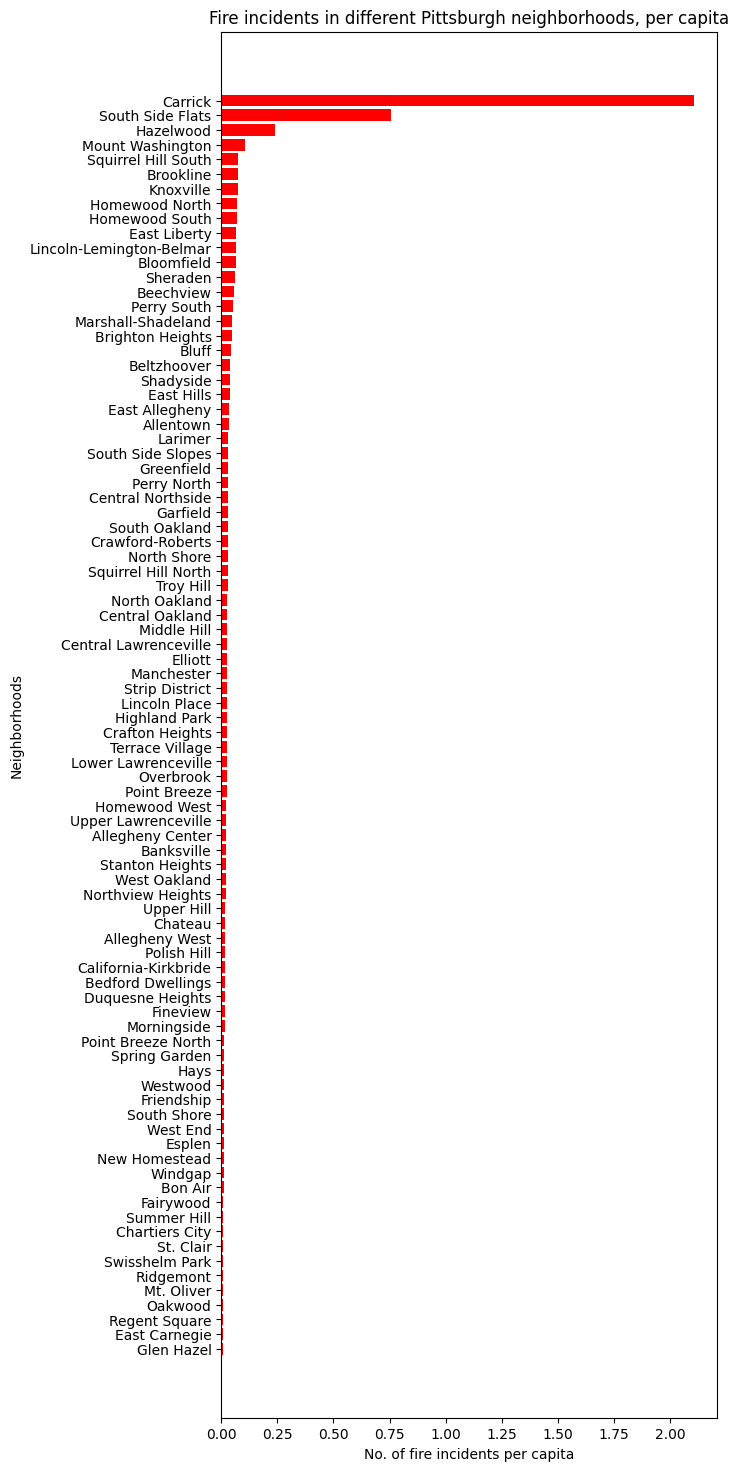

In [63]:
plt.figure().set_figwidth(5)
plt.figure().set_figheight(18)

numOfIncidentsPerCapita = data_per_capita.values()
plt.barh(neighborhoods, numOfIncidentsPerCapita, color = "red")

plt.ylabel("Neighborhoods")
plt.xlabel("No. of fire incidents per capita")
plt.title("Fire incidents in different Pittsburgh neighborhoods, per capita")
plt.show()

# Crime